In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
import pandas as pd
import warnings
# warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [2]:
data = pd.read_csv('heart.csv')
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:13], data[["target"]], train_size=.8,random_state=45)

c:\users\subhani\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Training

In [3]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5,n_jobs=-1)

model.fit(X_train, y_train)

c:\users\subhani\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\subhani\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [4]:
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.9166666666666667


### Evaluation metrics

#### Confusion matrix

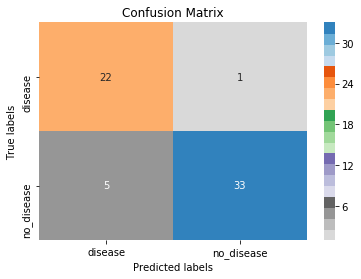

In [5]:
cm=confusion_matrix(y_test, model.predict(X_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='tab20c_r'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['disease', 'no_disease']); ax.yaxis.set_ticklabels(['disease', 'no_disease']);

In [7]:
scores = model.predict_proba(X_test)
print(scores)

[[0.04860737 0.95139263]
 [0.20007444 0.79992556]
 [0.01581157 0.98418843]
 [0.04012635 0.95987365]
 [0.18509602 0.81490398]
 [0.07729573 0.92270427]
 [0.53378853 0.46621147]
 [0.96938316 0.03061684]
 [0.03883072 0.96116928]
 [0.87899596 0.12100404]
 [0.56548466 0.43451534]
 [0.02938946 0.97061054]
 [0.18911715 0.81088285]
 [0.73758133 0.26241867]
 [0.96754877 0.03245123]
 [0.99384689 0.00615311]
 [0.21906293 0.78093707]
 [0.95677104 0.04322896]
 [0.97907656 0.02092344]
 [0.30071682 0.69928318]
 [0.13160281 0.86839719]
 [0.03349291 0.96650709]
 [0.20202352 0.79797648]
 [0.04103326 0.95896674]
 [0.35580202 0.64419798]
 [0.09629465 0.90370535]
 [0.07695066 0.92304934]
 [0.063429   0.936571  ]
 [0.23158806 0.76841194]
 [0.91850093 0.08149907]
 [0.08986561 0.91013439]
 [0.50023343 0.49976657]
 [0.9745686  0.0254314 ]
 [0.99057908 0.00942092]
 [0.73564096 0.26435904]
 [0.0310918  0.9689082 ]
 [0.70459603 0.29540397]
 [0.03830201 0.96169799]
 [0.98944879 0.01055121]
 [0.12373212 0.87626788]


#### ROC plot

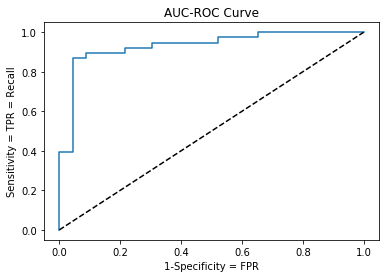

In [8]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity = FPR')
plt.ylabel("Sensitivity = TPR = Recall")
plt.title("AUC-ROC Curve")
plt.show()

In [9]:
roc_auc

0.9324942791762014